In [1]:
import Final_optimized_bckwd_script

#Error because of spec_offset in the load_workspace


 Loading the sample runs:  44462-44463 


 Loading the empty runs:  43868-43911 

(132, 144) (132, 144)
Data_ip first column: 
 [  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.]


ValueError: operands could not be broadcast together with shapes (130,143) (132,1) 

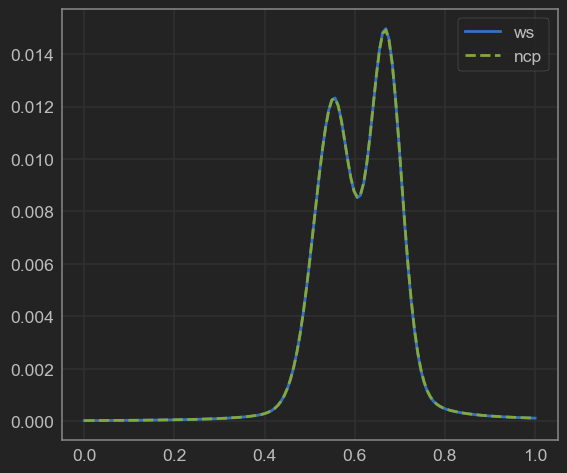

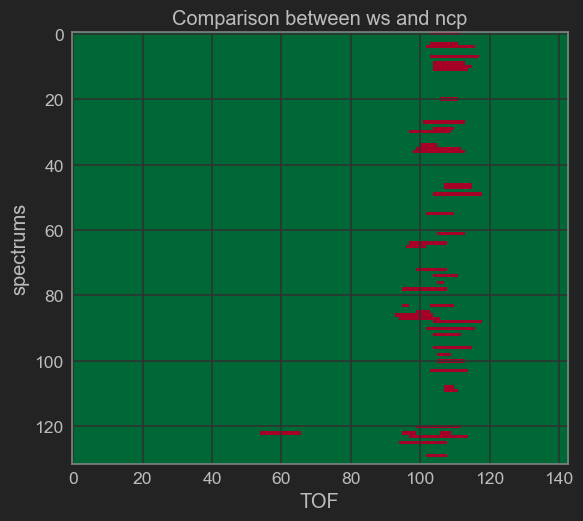

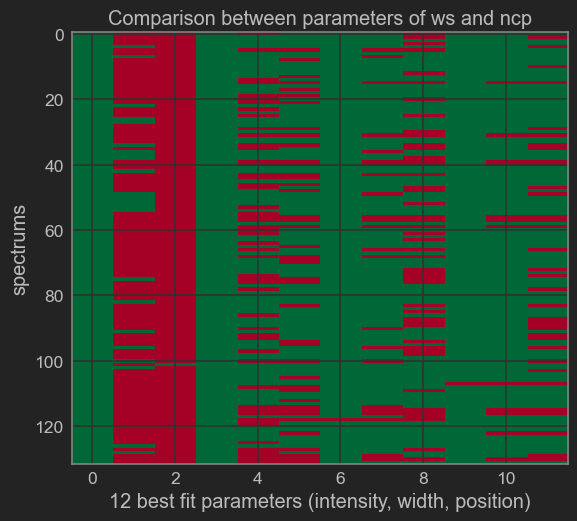

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
syn = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild_synthetic_fit.npz")

ws = syn["all_fit_workspaces"][0, :, :-1]
ncp = syn["all_tot_ncp"][0]


x = np.linspace(0, 1, len(ncp[0]))
plt.figure(3)
plt.plot(x, ws[3], label="ws", linewidth = 2)
plt.plot(x, ncp[3], "--", label="ncp", linewidth = 2)
plt.legend()
plt.show()

opt = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild.npz")

opt_pars = opt["all_spec_best_par_chi_nit"][0][:, 1:-2]
syn_pars = syn["all_spec_best_par_chi_nit"][0][:, 1:-2]

#np.testing.assert_allclose(opt_pars, syn_pars, rtol=0.1)
ncp_mask = np.isclose(ws, ncp, rtol=0.01, equal_nan = True)
plt.figure(0)
plt.imshow(ncp_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
plt.title("Comparison between ws and ncp")
plt.xlabel("TOF")
plt.ylabel("spectrums")
plt.show()

pars_mask = np.isclose(opt_pars, syn_pars, rtol=0.01, equal_nan=True)
fig = plt.figure(1)
plt.imshow(pars_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
plt.title("Comparison between parameters of ws and ncp")
plt.xlabel("12 best fit parameters (intensity, width, position)")
plt.ylabel("spectrums")
plt.show()

In [8]:
import numpy as np
syn = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild_synthetic_fit.npz")
opt = np.load(r"C:\Users\guijo\Desktop\work_repos\scatt_scripts\backward\runs_data\opt_spec3-134_iter4_ncp_nightlybuild.npz")
for key in opt:
    try:
        print(key)
        np.testing.assert_array_equal(syn[key][0], opt[key][0])
    except KeyError:
        pass

all_fit_workspaces
all_spec_best_par_chi_nit
all_mean_widths
all_mean_intensities
all_tot_ncp
all_indiv_ncp


In [12]:
import numpy as np
A = np.arange(12).reshape(4,3)
A[:, 0] *= 5
A

array([[ 0,  1,  2],
       [15,  4,  5],
       [30,  7,  8],
       [45, 10, 11]])